# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Aprendizaje Supervisado

Esta notebook les permitiria integrar y ejercitar los conceptos de Pandas 🐼 , Analisis Exploratorio, Procesamiento de datos 📊 y aprendizaje automatico que aprendimos hasta ahora.

En este caso, vamos a trabajar con dos dataset nuevos. El primer dataset contiene sobre [cancer de mamá](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) y es adecuado para problemas de clasificación. El segundo dataset contiene datos sobre [venta de autos](https://www.kaggle.com/sanskrutipanda/car-pricing-prediction) y es adecuado para problemas de regresión.

El objetivo de este projecto es ajustar modelos de regresión y clasificación. Luego mediante las metricas que hemos estudiados, elegir aquel que mejor desempeño tuvo (para cada tipo de problema).

Como son datasets nuevos y no los conocemos, debemos comenzar nuestro análisis desde zero. Eso significa que debes realizar un análisis exploratorio y el correspondiente procesamiento y transformación de los datos. El análisis exploratorio te permitira hacerte preguntas sobre los datos y poder luego, elegir que modelos es posible ajustar según que variable deseas predecir y las caracteristicas de las variables independendientes.

En la Notebook se sugieren dos algoritmos en cada caso. Sin embargo, pueden elegir otros. La idea es que piensen porque esos algoritmos serían utiles en nuestro caso. Y que ventaja tiene usar cada uno. A su vez, realicen la evaluación de los modelos y decidan porque elegirian uno sobre el otro.

### 🚀 👩🏽‍💻 Aprendizaje Supervisado 📣

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Notebook 19

### 1) Clasificación 🟢 🟣 🟡

In [ ]:
# Funcion auxiliar feature importance
def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model

    :returns a plot with feature importance
    """
    # Obtiene la lista de importancias
    importances = list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print la lista de importancias
    [print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))

    # Caracteristicas en orden de importancia
    characteristics = [x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot = [x[1] for x in feature_importances]
    # Grafica un bar plot
    plt.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    plt.xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3);

Primero, vamos a leer los datos para la clasificación.

In [ ]:
clasificacion = pd.read_csv('cancer_mamario.csv')

In [ ]:
clasificacion.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### 🔬 Análisis Exploratorio 🎉

¿Cuantas filas y columnas tiene el dataset?

In [ ]:
clasificacion.shape

(286, 10)

**Numero de columnas**: 10 (atributos)   
**Numero de filas**: 286 (observaciones)

¿Cual es el nombre de las columnas contenidas?

In [ ]:
clasificacion.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

¿Que tipos de datos contiene cada una de las columnas?

In [ ]:
clasificacion.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

¿Hay valores faltantes?

In [ ]:
print(f"Valores faltantes en cada atributo: \n{clasificacion.isnull().sum()}")

Valores faltantes en cada atributo: 
class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


Si bien no hay valores faltantes, veamos si hay algún valor que resulte raro y pueda ser interpretado como faltante.

In [ ]:
for column in clasificacion.columns:
    print(f'Columna: {column}, Valores:{clasificacion[column].unique()}')

Columna: class, Valores:['no-recurrence-events' 'recurrence-events']
Columna: age, Valores:['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Columna: menopause, Valores:['premeno' 'ge40' 'lt40']
Columna: tumor-size, Valores:['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Columna: inv-nodes, Valores:['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Columna: node-caps, Valores:['no' 'yes' '?']
Columna: deg-malig, Valores:[3 2 1]
Columna: breast, Valores:['left' 'right']
Columna: breast-quad, Valores:['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Columna: irradiat, Valores:['no' 'yes']


Podemos ver que en la columna `breast-quad`, hay un valor que es `?` y que puede ser interpretado como un valor faltante. Imputemos esos valores remplazandolos por el valor más frecuente.

In [ ]:
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

In [ ]:
clasificacion.loc[:, 'breast-quad'] = imputer.fit_transform(clasificacion[['breast-quad']])

Todas las variables son categoricas, así que las visalizamos en gráficos.

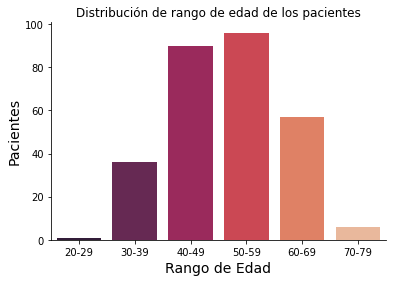

In [ ]:
sns.countplot(x=clasificacion.sort_values('age')['age'], palette='rocket')
plt.xlabel('Rango de Edad', size=14)
plt.ylabel('Pacientes', size=14)
plt.title('Distribución de rango de edad de los pacientes')
sns.despine()

In [ ]:
categories = {
    '0-4': 0,
    '5-9': 1,
    '10-14': 2,
    '15-19': 3,
    '20-24': 4,
    '25-29': 5,
    '30-34': 6,
    '35-39': 7,
    '40-44': 8,
    '45-49': 9,
    '50-54': 10
}

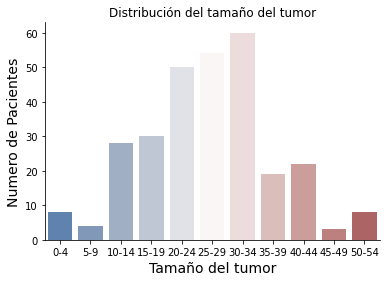

In [ ]:
sns.countplot(x=clasificacion['tumor-size'].apply(lambda x: categories[x]), palette='vlag')
plt.xticks(np.arange(11), categories.keys())
plt.xlabel('Tamaño del tumor', size=14)
plt.ylabel('Numero de Pacientes', size=14)
plt.title('Distribución del tamaño del tumor')
sns.despine()

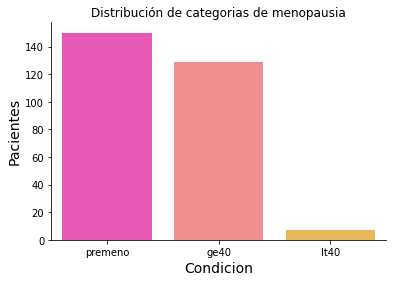

In [ ]:
sns.countplot(x=clasificacion['menopause'], palette='spring')
plt.xlabel('Condicion', size=14)
plt.ylabel('Pacientes', size=14)
plt.title('Distribución de categorias de menopausia')
sns.despine()

In [ ]:
categories = {
    '0-2': 0,
    '3-5': 1,
    '6-8': 2,
    '9-11': 3,
    '12-14': 4,
    '15-17': 5,
    '24-26': 6
}

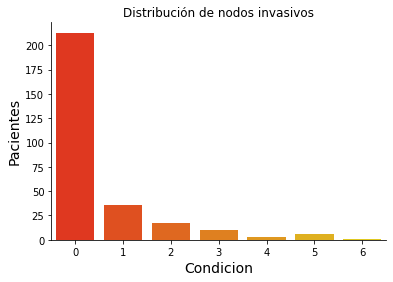

In [ ]:
sns.countplot(x=clasificacion['inv-nodes'].apply(lambda x: categories[x]), palette='autumn')
plt.xlabel('Condicion', size=14)
plt.ylabel('Pacientes', size=14)
plt.title('Distribución de nodos invasivos')
sns.despine()

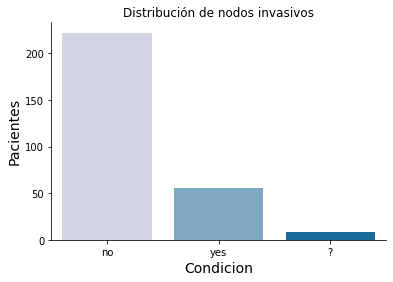

In [ ]:
sns.countplot(x=clasificacion['node-caps'], palette='PuBu')
plt.xlabel('Condicion', size=14)
plt.ylabel('Pacientes', size=14)
plt.title('Distribución de nodos invasivos')
sns.despine()

In [ ]:
clasificacion['class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

In [ ]:
clasificacion['class'].value_counts() / clasificacion['class'].shape[0] * 100

no-recurrence-events    70.27972
recurrence-events       29.72028
Name: class, dtype: float64

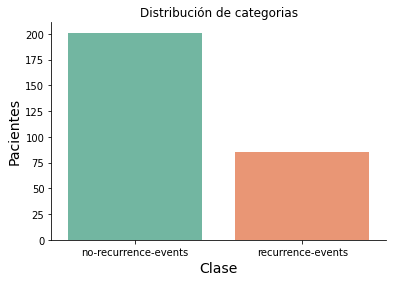

In [ ]:
sns.countplot(x=clasificacion['class'], palette='Set2')
plt.xlabel('Clase', size=14)
plt.ylabel('Pacientes', size=14)
plt.title('Distribución de categorias')
sns.despine()

### 🛠 Procesamiento y transformación de datos 🔧

Como las variables son categoricas, vamos a transformarlas en variables numericas para poder incorporarlas al modelo que elijamos. Para esto vamos a tomar diferentes estrategias utilizando todo lo que vimos en la clase 6 de transformación de datos.

In [ ]:
clasificacion.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Transformamos la variable `class` utilizando el metodo apply: Assignamos 0 a eventos no recurrentes, ya que lo consideramos como una respuesta negativa y 1 a eventos recurrentes (ya que seria nuestra respuesta positiva).

In [ ]:
clasificacion['class'] = clasificacion['class'].apply(lambda x: 0 if x == 'no-recurrence-events' else 1)

Lo mismo con la variable `irradiat` y `node-caps`.

In [ ]:
clasificacion['irradiat'] = clasificacion['irradiat'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
clasificacion['node-caps'] = clasificacion['node-caps'].apply(lambda x: 0 if x == 'no' else 1)

Por el contrario, utilizaremos `LabelEncoder` para poder transformar la variable `age`. En este caso, utilizaremos este encoding ya que podemos considerar que siguen un orden y que la edad puede afectar incremental o decrementalmente la aparición de eventos recurrentes. Lo mismo haremos con la variable `tumor-size` y `inv-nodes`.

In [ ]:
age_encoder = LabelEncoder()

In [ ]:
clasificacion.loc[:, 'age'] = age_encoder.fit_transform(clasificacion['age'])

In [ ]:
size_encoder = LabelEncoder()

In [ ]:
clasificacion.loc[:, 'tumor-size'] = size_encoder.fit_transform(clasificacion['tumor-size'])

In [ ]:
nodes_encoder = LabelEncoder()

In [ ]:
clasificacion.loc[:, 'inv-nodes'] = size_encoder.fit_transform(clasificacion['inv-nodes'])

Para las variables `menopause`, `breast` y `breast-quad`, utilizaremos `get_dummies()`.

In [ ]:
clasificacion = pd.get_dummies(clasificacion, columns=['menopause', 'breast', 'breast-quad'])

In [ ]:
clasificacion.head()

,class,age,tumor-size,inv-nodes,node-caps,deg-malig,irradiat,menopause_ge40,menopause_lt40,menopause_premeno,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,1,5,0,0,3,0,0,0,1,1,0,0,1,0,0,0
1,0,2,3,0,0,2,0,0,0,1,0,1,0,0,0,0,1
2,0,2,3,0,0,2,0,0,0,1,1,0,0,1,0,0,0
3,0,4,2,0,0,2,0,1,0,0,0,1,0,0,1,0,0
4,0,2,0,0,0,2,0,0,0,1,0,1,0,0,0,1,0


#### Seleccion de target (y) y variables (X)

In [ ]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = clasificacion.drop(['class'], axis=1)

In [ ]:
lista_atributos = x.columns

In [ ]:
# Ahora selecciono las etiquetas y las guardo en y.
y = clasificacion['class']

In [ ]:
x, y = np.array(x), np.array(y)

#### Separando Train / Test

Ahora tenemos que separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test, y_test) usando la función train_test_split de scikit-learn.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape

(228, 16)

In [ ]:
X_test.shape

(58, 16)

### Modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# metricas
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

#### Clasificador KNN

Optimizar los parameteros del clasificador kNN. Empecemos encontrando el mejor K.

In [ ]:
####
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

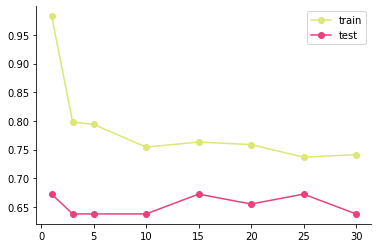

In [ ]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend()
sns.despine();

Y ahora hagamos una busqueda con `GridSearchCV` para obtener los hiperparametros optimos utilizando ademas validación cruzada.

In [ ]:
# Valores para los parametros a optimizar
param_grid_vec = {
    'n_neighbors': [23, 25, 27],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [ ]:
knn_search = KNeighborsClassifier()

In [ ]:
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [ ]:
vecinos_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [23, 25, 27],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
# Mejores hiperparametros
vecinos_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}

Ahora entrenemos el modelo final.

In [ ]:
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='uniform')

In [ ]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

In [ ]:
new_predictions = knn_best.predict(X_test)

**Metricas**

Matriz de confusión:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP)  


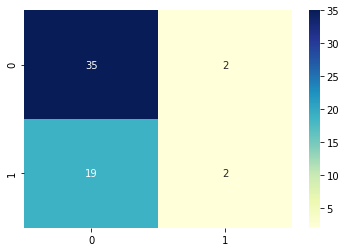

In [ ]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions)*100 :.2f}%")

Accuracy: 63.79%
Precision: 50.00%
Recall: 9.52%
F1 score: 16.00%


#### Clasificador RandomForest

Probemos con otro modelo: un Random Forest para ver como le va.

In [ ]:
# Valores para los parametros a optimizar
param_grid_vec_random = {
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [2, 3, 4, 8, 10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'n_estimators': [10, 15, 20, 30, 50, 100]

}

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
rf_search = GridSearchCV(estimator=random_forest, param_grid=param_grid_vec_random,
                         cv=3, verbose=2, n_jobs=-1)

In [ ]:
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1417 out of 1440 | elapsed:   12.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   12.8s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 15, 20, 30, 50, 100]},
             verbose=2)

In [ ]:
# Mejores hiperparametros
rf_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 15}

Ahora entrenemos el modelo final.

In [ ]:
rf_best = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=3, max_features='log2', n_estimators=20)

In [ ]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=20)

In [ ]:
new_predictions_rf = rf_best.predict(X_test)

**Metricas**

Matriz de confusión:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP)  


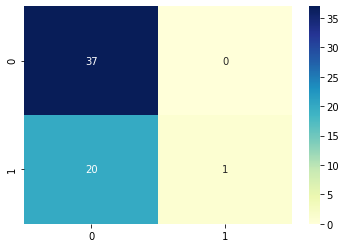

In [ ]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions_rf)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions_rf)*100 :.2f}%")

Accuracy: 65.52%
Precision: 100.00%
Recall: 4.76%
F1 score: 9.09%


Variable: deg-malig Importance: 0.24
Variable: inv-nodes Importance: 0.2
Variable: node-caps Importance: 0.16
Variable: tumor-size Importance: 0.12
Variable: age Importance: 0.06
Variable: breast-quad_left_up Importance: 0.04
Variable: breast-quad_right_low Importance: 0.04
Variable: irradiat Importance: 0.03
Variable: menopause_ge40 Importance: 0.03
Variable: menopause_lt40 Importance: 0.01
Variable: menopause_premeno Importance: 0.01
Variable: breast_left Importance: 0.01
Variable: breast_right Importance: 0.01
Variable: breast-quad_central Importance: 0.01
Variable: breast-quad_left_low Importance: 0.01
Variable: breast-quad_right_up Importance: 0.01


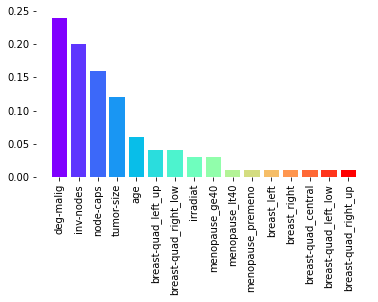

In [ ]:
feature_importance(rf_best, lista_atributos)

En este caso, nos importa minimizar los falsos negativos. Por lo tanto, nuestra metrica es Recall. Podemos observar que ninguno de los dos modelos tiene un recall alto y por lo tanto, no serian indicados para poder tomar este modelo como final. Una de las cosas que podriamos hacer es sacar aquellas variables que no son importantes (usando el feature importance) y poder encontrar nuevos parametros para el modelo y re-entrenar el modelo para ver si podemos alcanzar mejores valores.

# Notebook 20
### 2) Regresión 1️⃣ 2️⃣

In [ ]:
regresion = pd.read_csv('venta_autos.csv')

In [ ]:
regresion.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


### 🔬 Análisis Exploratorio 🎉

¿Cuantas filas y columnas tiene el dataset?

In [ ]:
regresion.shape

(50001, 19)

**Numero de columnas**: 19 (atributos)   
**Numero de filas**: 50001 (observaciones)

¿Cual es el nombre de las columnas contenidas?

In [ ]:
regresion.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

¿Que tipos de datos contiene cada una de las columnas?

In [ ]:
regresion.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

### ¿Hay valores faltantes?

In [ ]:
print(f"Valores faltantes en cada atributo: \n{regresion.isnull().sum()}")

Valores faltantes en cada atributo: 
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64


In [ ]:
print(f"Porcentaje faltantes en cada atributo: \n{regresion.isnull().sum() / regresion.shape[0] * 100}")

Porcentaje faltantes en cada atributo: 
dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.375792
yearOfRegistration      0.000000
gearbox                 5.647887
powerPS                 0.000000
model                   5.515890
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                9.005820
brand                   0.000000
notRepairedDamage      19.431611
dateCreated             0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64


Como podemos ver, hay cinco atributos que tienen bastantes varlores faltantes. Aquí debemos decidir que vamos a hacer con ellos. Comencemos analizando atributo por atributo:

1. **notRepairedDamage**

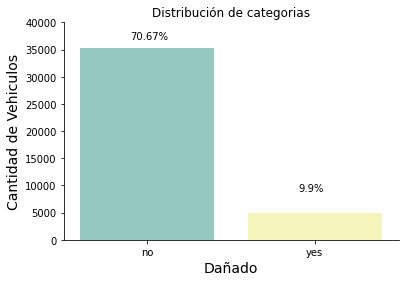

In [ ]:
sns.countplot(x=regresion['notRepairedDamage'], palette='Set3')
plt.xlabel('Dañado', size=14)
plt.ylabel('Cantidad de Vehiculos', size=14)

no_dañados = f"{round(regresion['notRepairedDamage'].value_counts()['no']/regresion.shape[0]*100, 2)}%"
dañados = f"{round(regresion['notRepairedDamage'].value_counts()['yes']/regresion.shape[0]*100, 2)}%"


plt.text(x=-0.1, y=37000, s=no_dañados)
plt.text(x=0.9, y=9000, s=dañados)
plt.title('Distribución de categorias')
plt.ylim(0, 40000)
sns.despine()

Vemos que la mayoría de los vehículos no estan dañados, y podriamos asumir que los valores faltantes en el dataset son random, eso significa que si faltan es porque me estan diciendo algo de esa variable. Podriamos decir que si no se coloco nada en esa celda, es porque no esta dañado. Así que imputemos los valores de esa manera.

In [ ]:
imputer_dañados = SimpleImputer(strategy='constant', fill_value='no')

In [ ]:
regresion.loc[:, 'notRepairedDamage'] = imputer_dañados.fit_transform(regresion[['notRepairedDamage']])

2. **vehicleType**, **model**, **fuelType**, y **gearbox**

Veamos ahora el resto de las variables que tienen datos faltantes, para eso inspeccionemos si hay filas que no tienen datos en estas tres columnas:

In [ ]:
regresion[regresion[['vehicleType', 'model', 'gearbox']].isnull().all(axis=1)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
43,10/3/2016 7:55,Daihatsu._Daihatsu,private,offer,0,control,NaN,2000,NaN,45,NaN,100000,0,NaN,daihatsu,no,10/3/2016 0:00,79312,6/4/2016 4:45
46,26/03/2016 17:52,Familie_mit_drei_Kindern_und_Hund_sucht_Van,private,offer,7000,control,NaN,2007,NaN,110,NaN,100000,0,diesel,sonstige_autos,no,26/03/2016 0:00,9380,6/4/2016 6:46
60,9/3/2016 20:47,Mercedes_C_180_Automatik,private,offer,1400,test,NaN,2017,NaN,122,NaN,150000,7,petrol,mercedes_benz,no,9/3/2016 0:00,70188,18/03/2016 2:16
239,10/3/2016 23:44,Guenstiges_auto_gesucht,private,offer,500,test,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,no,10/3/2016 0:00,54636,7/4/2016 4:15
355,3/4/2016 14:36,Hilfe_Hilfe_Hilfe,private,offer,10010011,test,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,no,3/4/2016 0:00,44532,5/4/2016 13:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49798,30/03/2016 22:45,US_Cadillac_Coupe_de_Ville_USA_V8,private,offer,8500,control,NaN,1980,NaN,0,NaN,100000,0,NaN,sonstige_autos,no,30/03/2016 0:00,91352,5/4/2016 13:17
49815,19/03/2016 8:37,Suche_dringend_Pkw!!!,private,offer,1000,test,NaN,1995,NaN,0,NaN,150000,0,NaN,sonstige_autos,no,19/03/2016 0:00,45964,6/4/2016 7:17
49848,22/03/2016 23:48,Suche_Auto,private,offer,1,test,NaN,1980,NaN,0,NaN,150000,1,other,sonstige_autos,no,22/03/2016 0:00,44869,27/03/2016 8:17
49885,16/03/2016 0:38,Reno_master_kombi,private,offer,1240,test,NaN,2000,NaN,0,NaN,150000,0,NaN,renault,no,15/03/2016 0:00,40227,22/03/2016 11:18


Vemos que hay 440 filas donde estas cuatro columnas tienen valores faltantes. Así que comencemos por eliminar estas filas.

In [ ]:
regresion.dropna(subset=['vehicleType', 'model', 'gearbox'], how='all', inplace=True)

In [ ]:
regresion.shape

(49561, 19)

Vemos que hemos eliminado las filas correspondientes. Ahora que estrategia podremos seguir en este caso. Podemos observar que la columna **Name** contiene bastante información de los vehiculos. En muchos de ellos podriamos obtener el modelo de estas filas que faltan (Utilizando regex quizas). Luego podriamos hacer una investigación y poder obtener de otras fuentes que tipo de vehiculo corresponde a esa marca y modelo, y quizás incluso obtener que tipo de caja poseen. Lo mismo para la variable **fuelType**.

Obviamente que esto consumiria bastante tiempo, y quizás valga la pena hacerlo para un proyecto real. En este caso, vamos a intentar una estrategia mucho más facil. Como vemos que tenemos más de 49000 observaciones, tomemos como primer camino el de eliminar todas las filas con valores faltantes en estas cuatro columnas.

In [ ]:
regresion.dropna(subset=['vehicleType', 'model', 'gearbox', 'fuelType'], how='any', inplace=True)

In [ ]:
regresion.shape

(40272, 19)

Aún eliminando todos las filas con valores faltantes tenemos 40mil observaciones.

### Analisis de los atributos

Veamos de nuevo que atributos tenemos en este dataset.

In [ ]:
regresion.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

- El atributo *dateCrawled* nos da información de cuando el dato fue obtenido. Si bien podriamos pensar que si tengo un dataset a lo largo del tiempo no es lo mismo si estos datos fueron obtenidos hoy o hace dos años atrás (ya que probablemente los precios hayan cambiado), podemos por ahora ignorar este atributo. Así también, el atributo *postalCode* puede indicar que el precio varia por localidad. Sin embargo, por ahora no lo incluiremos.

- El atributo *name* solo me dice el nombre completo del auto pero esta información, si nos fijamos, resulta redundante con la marca, el modelo y el tipo de vehiculo. Asi que tampoco la usaremos.

- Los atributos *dateCreated* y *lastSeen* describen cuando fue creado el anuncio, que tampoco nos brinda información del vehículo.

1. **seller** y **offerType**

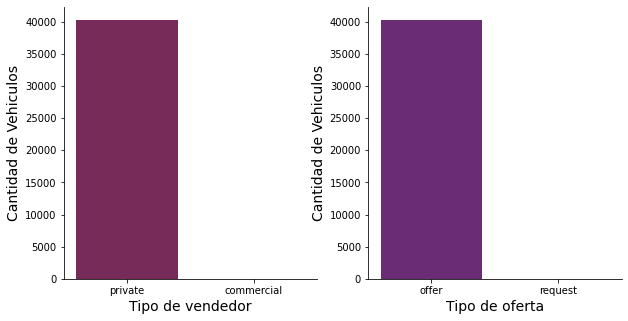

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Grafiquemos tipo de vendedor
sns.countplot(x=regresion['seller'], palette='rocket', ax=ax[0])
ax[0].set_xlabel('Tipo de vendedor', size=14)
ax[0].set_ylabel('Cantidad de Vehiculos', size=14)

# Grafiquemos tipo de oferta
sns.countplot(x=regresion['offerType'], palette='magma', ax=ax[1])
ax[1].set_xlabel('Tipo de oferta', size=14)
ax[1].set_ylabel('Cantidad de Vehiculos', size=14)

sns.despine()

Como podemos ver, ambos atributos tienen un 100% de sus valores en una sola categoría, y la otra categoría esta muy poco representada. Por lo que no aporta mucho valor predictivo, incluir estas variables en el modelo.

2. **abtest**

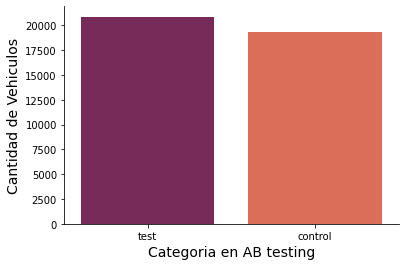

In [ ]:
# Grafiquemos tipo de vendedor
sns.countplot(x=regresion['abtest'], palette='rocket')
plt.xlabel('Categoria en AB testing', size=14)
plt.ylabel('Cantidad de Vehiculos', size=14)
sns.despine()

Podemos ver que ambas categorias estan igualmente representadas.

3. **vehicleType** y **brand**

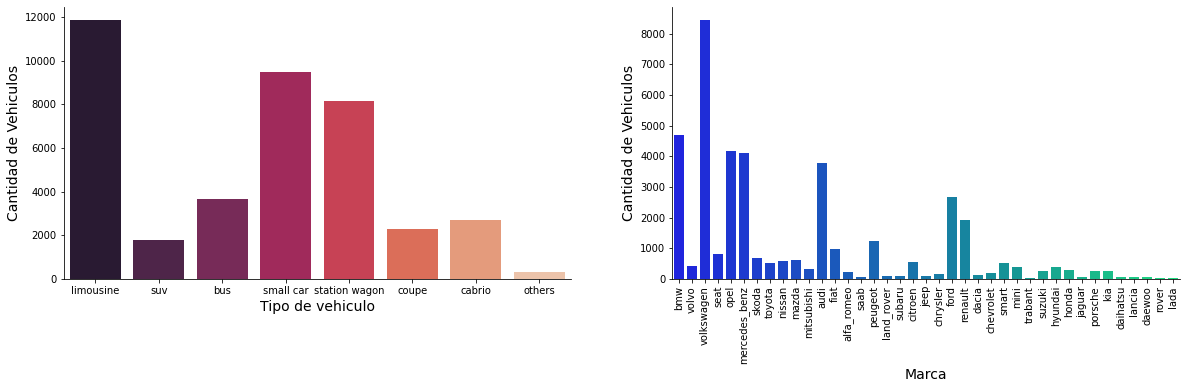

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Grafiquemos tipo de vehiculo
sns.countplot(x=regresion['vehicleType'], palette='rocket', ax=ax[0])
ax[0].set_xlabel('Tipo de vehiculo', size=14)
ax[0].set_ylabel('Cantidad de Vehiculos', size=14)

# Grafiquemos marca
sns.countplot(x=regresion['brand'], palette='winter', ax=ax[1])
ax[1].set_xlabel('Marca', size=14)
ax[1].set_ylabel('Cantidad de Vehiculos', size=14)
ax[1].set_xticklabels(regresion['brand'].unique(), rotation=90)
sns.despine()

4. **gearbox** y **fuelType**

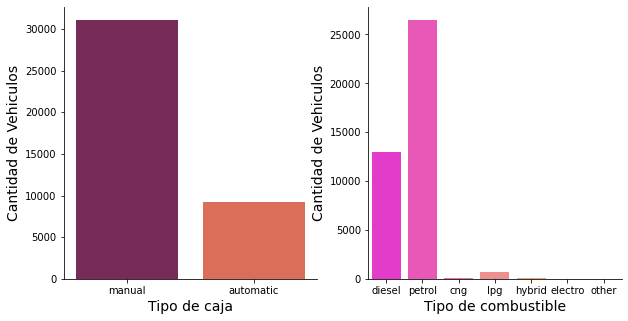

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Grafiquemos tipo de vehiculo
sns.countplot(x=regresion['gearbox'], palette='rocket', ax=ax[0])
ax[0].set_xlabel('Tipo de caja', size=14)
ax[0].set_ylabel('Cantidad de Vehiculos', size=14)

# Grafiquemos marca
sns.countplot(x=regresion['fuelType'], palette='spring', ax=ax[1])
ax[1].set_xlabel('Tipo de combustible', size=14)
ax[1].set_ylabel('Cantidad de Vehiculos', size=14)
sns.despine()

5. **yearOfRegistration**

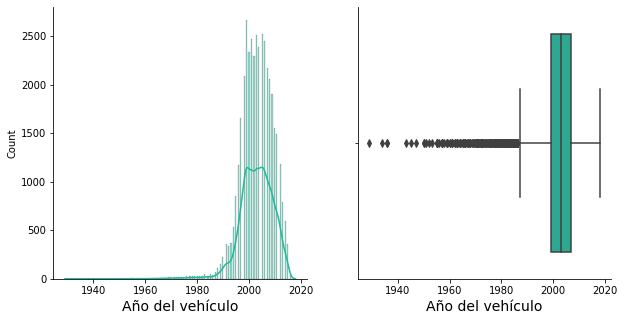

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.histplot(x=regresion['yearOfRegistration'], color='#1ABC9C', kde=True, ax=ax[0])
ax[0].set_xlabel('Año del vehículo', size=14)

# boxplot
sns.boxplot(x=regresion['yearOfRegistration'], color='#1ABC9C', ax=ax[1])
ax[1].set_xlabel('Año del vehículo', size=14)

sns.despine()

6. **kilometer**

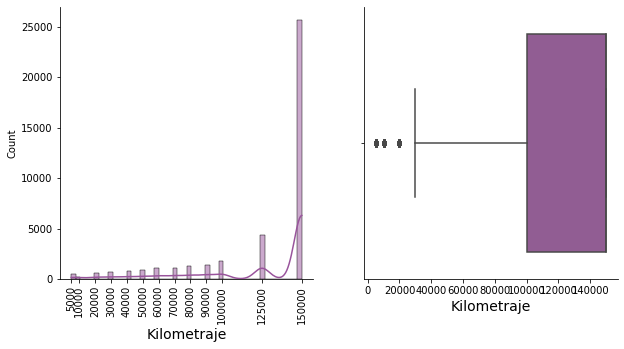

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.histplot(x=regresion['kilometer'], color='#99549c', kde=True, ax=ax[0])
ax[0].set_xlabel('Kilometraje', size=14)

labels = sorted(regresion['kilometer'].unique().tolist())
ax[0].set_xticks(labels)
ax[0].set_xticklabels(labels, rotation=90)

# boxplot
sns.boxplot(x=regresion['kilometer'], color='#99549c', ax=ax[1])
ax[1].set_xlabel('Kilometraje', size=14)

sns.despine()

In [ ]:
regresion['kilometer'].value_counts()

150000    25682
125000     4310
100000     1735
90000      1416
80000      1309
70000      1125
60000      1077
50000       891
40000       767
30000       680
20000       619
5000        459
10000       202
Name: kilometer, dtype: int64

6. Variable target: **price**

Vamos a analizar la distribución de esta variable y su relación con las variables independientes.

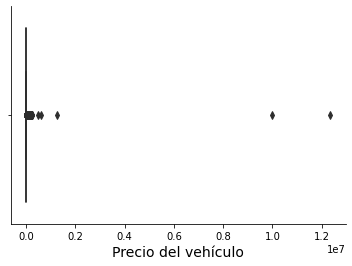

In [ ]:
# boxplot
sns.boxplot(x=regresion['price'], color='#311982')
plt.xlabel('Precio del vehículo', size=14)
sns.despine()

In [ ]:
regresion['price'].describe()

count    4.027200e+04
mean     6.910708e+03
std      7.996503e+04
min      0.000000e+00
25%      1.400000e+03
50%      3.500000e+03
75%      7.999000e+03
max      1.234568e+07
Name: price, dtype: float64

Podemos ver que el minimo es 0. Este valor es un valor extraño y a veces complica los modelos de regresión. Veamos cuantas filas tienen este valor  

In [ ]:
regresion[regresion['price'] == 0]['price'].count()

654

Una de las cosas que podemos hacer es eliminar los valores iguales a 0.

In [ ]:
regresion = regresion[regresion['price'] != 0].reset_index(drop=True)

Observamos también que hay outliers. Esto dificulta la visualización de nuestros datos sino que podría traer algunas consecuencias en nuestro modelo. Así que vamos a filtrarlos. Lo primero que haremos es visualizar los datos sin los outliers para poder determinar la distribución de nuestra variable target.

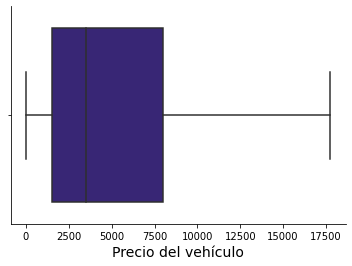

In [ ]:
# boxplot
sns.boxplot(x=regresion['price'], color='#311982', showfliers=False)
plt.xlabel('Precio del vehículo', size=14)
sns.despine()

Podemos ver que no es una distribución normal. Así que apliquemos el método del rango intercuartil.

In [ ]:
q1 = regresion['price'].quantile(0.25)
q3 = regresion['price'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
regresion = regresion[(regresion['price'] > lb) & (regresion['price'] < ub)]

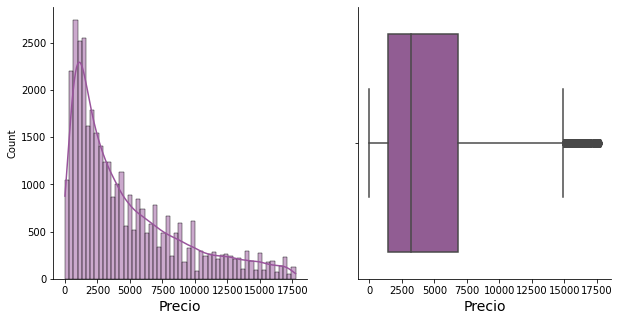

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.histplot(x=regresion['price'], color='#99549c', kde=True, ax=ax[0])
ax[0].set_xlabel('Precio', size=14)

# boxplot
sns.boxplot(x=regresion['price'], color='#99549c', ax=ax[1])
ax[1].set_xlabel('Precio', size=14)

sns.despine()

*Heatmap para ver la correlación entre las variables numericas y el precio*

In [ ]:
correlacion = regresion.select_dtypes(include=['float64', 'int']).drop(['postalCode'], axis=1).corr()
correlacion

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.551161,0.144387,-0.357849,0.055971
yearOfRegistration,0.551161,1.000000,0.054671,-0.318477,0.046544
powerPS,0.144387,0.054671,1.000000,0.018162,0.012179
kilometer,-0.357849,-0.318477,0.018162,1.000000,-0.013148
monthOfRegistration,0.055971,0.046544,0.012179,-0.013148,1.000000


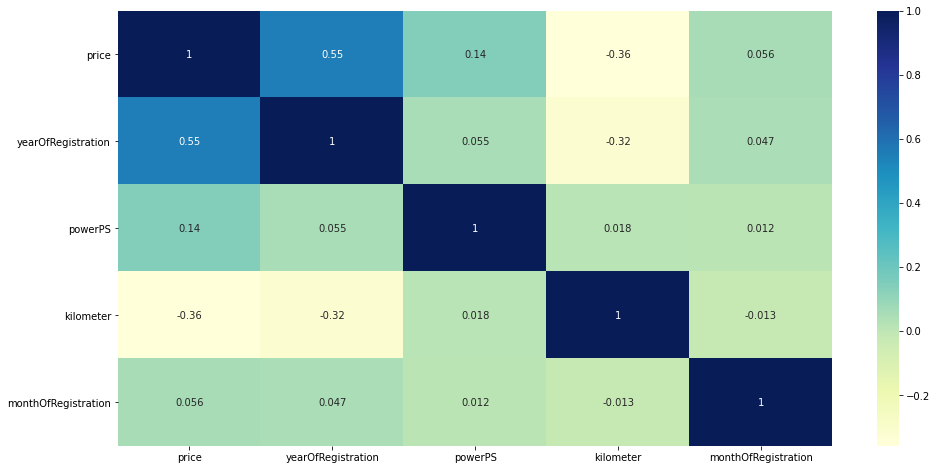

In [ ]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(correlacion, cmap="YlGnBu", annot=True)
plt.show()

Del heatmap, podemos ver que hay una leve correlación negativa (r=-0.36) entre año del vehículo y el kilometraje, lo cual tiene sentido. Así también observamos que el año del vehículo tiene una moderada correlación positiva (r=0.55) con el precio.

*Relación entre variables categoricas y precio*

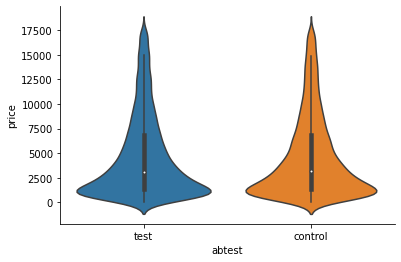

In [ ]:
sns.violinplot(x='abtest', y='price', data=regresion)
sns.despine()

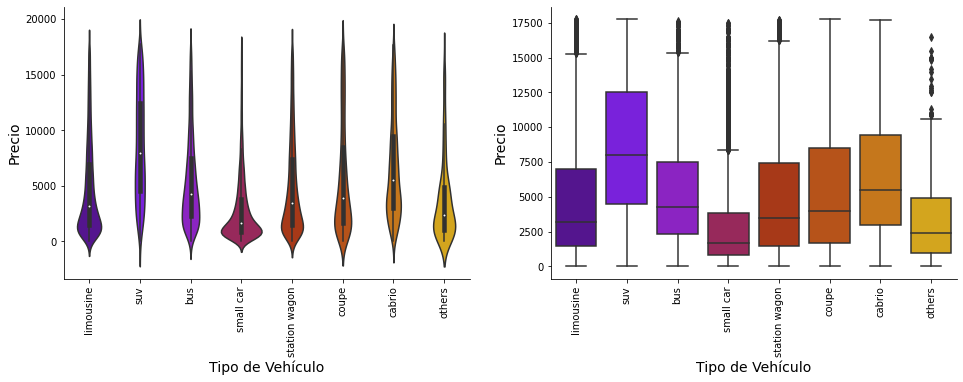

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
labels = regresion['vehicleType'].unique()

# violinplot
sns.violinplot(x="vehicleType", y="price", kind="swarm", data=regresion, ax=ax[0], palette='gnuplot')
ax[0].set_ylabel('Precio', size=14)
ax[0].set_xlabel('Tipo de Vehículo', size=14)
ax[0].set_xticklabels(labels, rotation=90)

# boxplot
sns.boxplot(x='vehicleType', y='price', data=regresion, ax=ax[1], palette='gnuplot')
ax[1].set_ylabel('Precio', size=14)
ax[1].set_xlabel('Tipo de Vehículo', size=14)
ax[1].set_xticklabels(labels, rotation=90)

sns.despine()

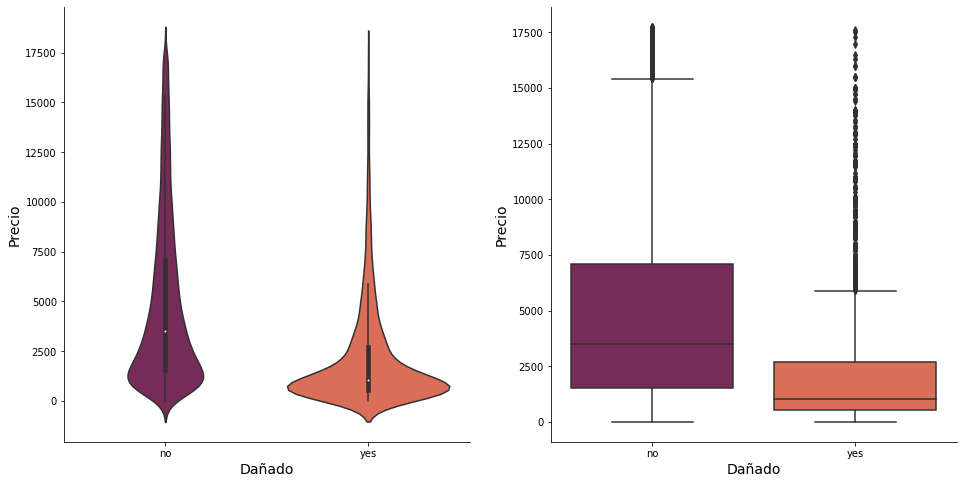

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# violinplot
sns.violinplot(x="notRepairedDamage", y="price", kind="swarm", data=regresion, ax=ax[0], palette='rocket')
ax[0].set_ylabel('Precio', size=14)
ax[0].set_xlabel('Dañado', size=14)

# boxplot
sns.boxplot(x='notRepairedDamage', y='price', data=regresion, ax=ax[1], palette='rocket')
ax[1].set_xlabel('Dañado', size=14)
ax[1].set_ylabel('Precio', size=14)

sns.despine()

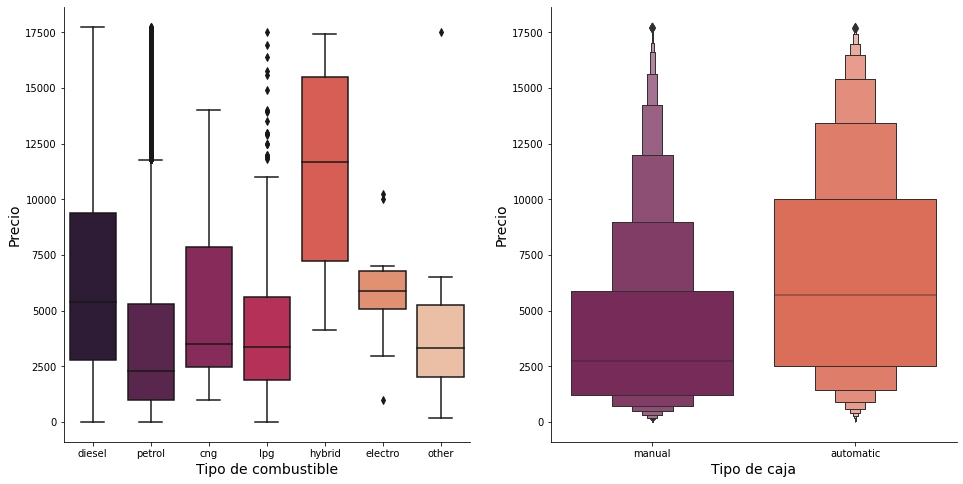

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# boxplot
sns.boxplot(x='fuelType', y='price', data=regresion, ax=ax[0], palette='rocket')
ax[0].set_xlabel('Tipo de combustible', size=14)
ax[0].set_ylabel('Precio', size=14)

# boxplot
sns.boxenplot(x='gearbox', y='price', data=regresion, ax=ax[1], palette='rocket')
ax[1].set_xlabel('Tipo de caja', size=14)
ax[1].set_ylabel('Precio', size=14)

sns.despine()

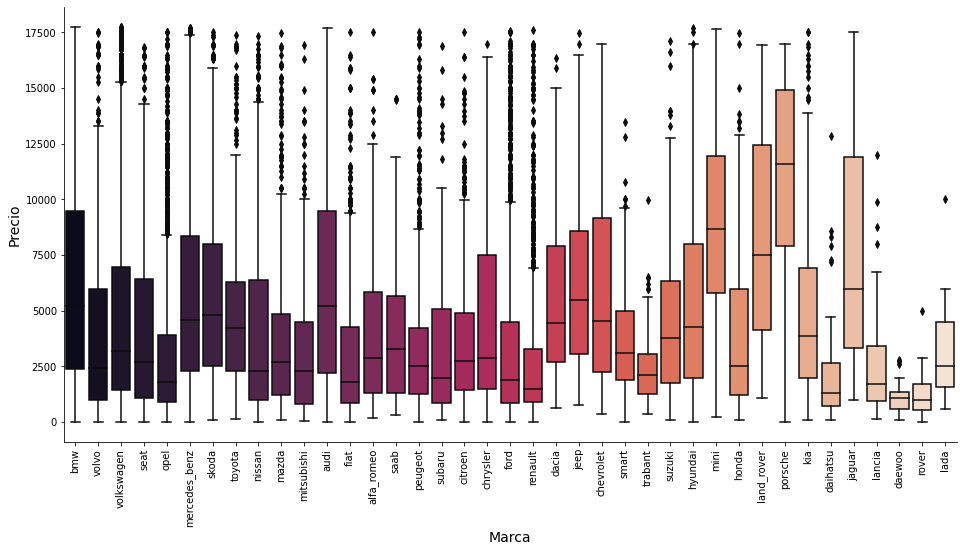

In [ ]:
plt.figure(figsize=(16, 8))

# boxplot
sns.boxplot(x='brand', y='price', data=regresion, palette='rocket')
plt.xlabel('Marca', size=14)
plt.ylabel('Precio', size=14)
plt.xticks(rotation=90)
sns.despine()

De los graficos podemos observar que:   
    - `abtest` no parece tener una influencia en el precio   
    - Los distintos tipos de vehículos tienen una mediana distinta, como así también, las distintas marcas de autos.   
    - El tipo de caja y combustible influye en el precio. Así como también, si el vehículo esta dañado o no.   

### 🛠 Procesamiento y transformación de datos 🔧

Vamos a transformar ahora los variables:   

1. Porqué hay variables categoricas, las convertiremos en variables númericas.
           
 a) Para las variables `vehicleType`, `gearbox`, `brand`, y `fuelType` utilizaremos variables dummies    
 b) Para `notRepairedDamage` asignaremos 0 si no esta dañado y 1 si lo esta
            
2. Debido a que entrenaremos un modelo de Support Vector Machine, debemos escalar los valores ya que este modelo trabaja con distancias. Así que utilizaremos `StandardScaler()`. Porque además funciona mejor si nuestra variable tiene una distribución normal, transformaremos también la variable `precio`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
regresion[['yearOfRegistration', 'powerPS', 'kilometer']] = sc_X.fit_transform(regresion[['yearOfRegistration', 'powerPS', 'kilometer']])

In [ ]:
regresion['price'] = sc_y.fit_transform(regresion[['price']])

In [ ]:
regresion['notRepairedDamage'] = regresion['notRepairedDamage'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
regresion = pd.get_dummies(regresion, columns=['vehicleType', 'gearbox', 'brand', 'fuelType'])

#### Seleccion de target (y) y variables (X)

In [ ]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x_reg = regresion.drop(['dateCrawled', 'name', 'seller', 'offerType', 'monthOfRegistration',
                        'dateCreated', 'postalCode', 'lastSeen', 'price', 'abtest', 'model'], axis=1)

In [ ]:
x_reg.head()

,yearOfRegistration,powerPS,kilometer,notRepairedDamage,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,...,brand_trabant,brand_volkswagen,brand_volvo,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol
0,0.079456,0.165452,0.578325,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.412251,0.231273,0.578325,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.079456,-0.082644,0.578325,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0.578648,-0.158591,-1.929045,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,-1.251724,-0.138339,0.578325,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
lista_atributos_reg = x_reg.columns

In [ ]:
# Ahora selecciono las etiquetas y las guardo en y.
y_reg = regresion['price']

In [ ]:
y_reg.head()

0   -0.045365
1    2.064509
2   -0.343404
3   -0.033444
5   -0.870813
Name: price, dtype: float64

In [ ]:
x_reg, y_reg = np.array(x_reg), np.array(y_reg)

#### Separando Train / Test

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reg, y_reg, test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train_r.shape

(29394, 60)

In [ ]:
X_test_r.shape

(7349, 60)

### Modelos

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from numpy.lib.scimath import sqrt

### Support Vector Machine

¿Por qué elegir Support Vector Machine?

- Es un algoritmo muy efectivo cuando trabajamos con datasets de alta dimensión.

- Es eficiente y esto permite trabajar con un dataset de muchas observaciones que además tiene muchos atributos

- Nos permite utilizar Kernels lo que lo hace muy versatil.


¿Qúe hiperparametro podemos optimizar?

`C`: Es el parámetro de regularización. Es la penalización que se usa. Indica que balance queremos lograr entre el error de entrenamiento y de testeo. Pueden leer más [acá](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167).   

`kernel`: especifica el tipo de kernel que se utilizará en el algoritmo.

`gamma`: es el coeficiente que se utiliza sólo para los kernel para "rbf", y "sigmoide". Leer más [acá](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167).

⚠️ **La búsqueda de parametros para Support Vector Machine toma aproximadamente 50-55 minutos para 27 modelos con una validación cruzada de 3-fold**

In [ ]:
svr = SVR()

In [ ]:
param_grid = { 'C':[0.1, 1, 100],
              'kernel':['rbf', 'sigmoid', 'linear'],
              'gamma': [1, 0.1, 0.01]}

In [ ]:
svc_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
svc_search.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 44.4min finished


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=2)

In [ ]:
svc_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
mejor_svc = SVR(C=1, kernel='rbf', gamma=0.1)

In [ ]:
mejor_svc.fit(X_train_r, y_train_r)

SVR(C=1, gamma=0.1)

#### Evaluación del modelo

In [ ]:
predicciones_svc = mejor_svc.predict(X_test_r)

In [ ]:
training_pred_svc = mejor_svc.predict(X_train_r)

Recuerden que hicimos una transformación del precio, utilizando StandardScaler. Por lo cual, para poder tener una mejor
idea del error debemos volver la variable precio (predicha y real) a su rango original. Eso se hace utilizando el metodo `inverse_transform`.

In [ ]:
# test
or_pred_test = sc_y.inverse_transform(predicciones_svc)
or_values_test = sc_y.inverse_transform(y_test_r)
# training
or_pred_train = sc_y.inverse_transform(training_pred_svc)
or_values_train = sc_y.inverse_transform(y_train_r)

In [ ]:
mean_absolute_error(or_values_test, or_pred_test)

1057.3145240735528

In [ ]:
mean_absolute_error(or_values_train, or_pred_train)

1003.6108864581863

Vamos a graficar el MAE:

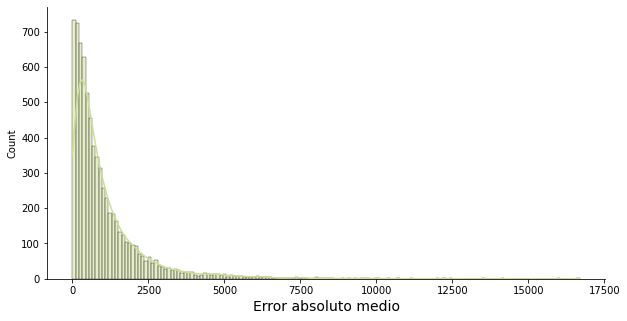

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=np.abs(or_values_test - or_pred_test), color='#ccde92', kde=True)
plt.xlabel('Error absoluto medio', size=14)
sns.despine()

In [ ]:
np.median(np.abs(or_values_test - or_pred_test))

632.6243464692684

In [ ]:
sqrt(mean_squared_error(or_values_test, or_pred_test))

1682.4897314695413

In [ ]:
sqrt(mean_squared_error(or_values_test, or_pred_test))

1682.4897314695413

In [ ]:
r2_score(or_values_test, or_pred_test)

0.8425572161853901

In [ ]:
r2_score(or_pred_train, or_values_train)

0.8172603738956963

El rango de los precios es de 0-17890. El MAE indica que el modelo predice con un error de +- 1000, la mediana del error absoluto medio, en cambio es de 600. El R^2 se encuentra en valores aproximadamente de 0.8, lo cual indica que la variabilidad en los precios es explicada por las variables independientes en gran medida. Si evaluamos los errores podremos ver que el MAE es muy similar entre entrenamiento y testeo, lo cual da la idea que el modelo no esta sufriendo de sobreajuste (overfitting).